### Import

In [313]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.stats import multivariate_normal as mnormal

### Parameters

In [321]:
nDim = 2
nEpochs = 100
nPoints = 200
noiselevel = 1.0/0.5
mu1 = [-noiselevel,-noiselevel]
mu2 = [+noiselevel,+noiselevel]
# sigma1 = np.random.random((2,2))
# sigma1 = np.dot(sigma1,sigma1.T)
# sigma2 = np.random.random((2,2))
# sigma2 = np.dot(sigma2,sigma2.T)
sigma1 = [[1,0],[0,1]]
sigma2 = [[1,0],[0,1]]

### Create Data

In [322]:
x1 = np.random.multivariate_normal(mu1,sigma1,nPoints/2)
x2 = np.random.multivariate_normal(mu2,sigma2,nPoints/2)
X = np.vstack((x1,x2))
c = np.hstack((np.zeros(nPoints/2),np.ones(nPoints/2)))

### Scatter Plot

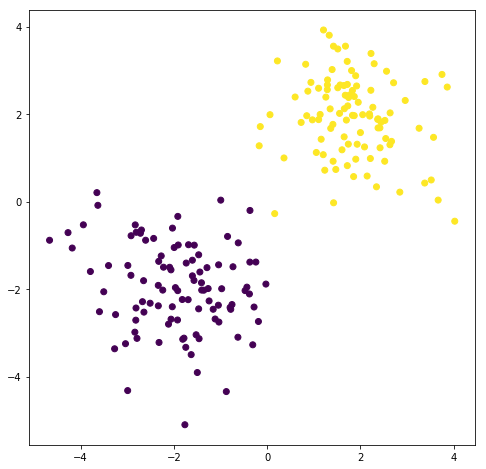

In [323]:
plt.figure(figsize=(8,8));
plt.scatter(X[:,0],X[:,1],c=c);

### Initialize

In [324]:
mus = []
sigmas = []
k = 2
for i in range(k):
    mu = np.random.random((nDim)) - 0.5
    sigma = [[1,0],[0,1]]
    mus.append(mu)
    sigmas.append(sigma)
mus = np.array(mus)
sigmas = np.array(sigmas).astype(float)

### Covariance Matrix

In [325]:
def covmatrix(X):
    
    S = np.zeros((2,2))
    S[0,0] = np.cov(X[:,0],X[:,0])[0][1]
    S[0,1] = np.cov(X[:,0],X[:,1])[0][1]
    S[1,0] = np.cov(X[:,1],X[:,0])[0][1]
    S[1,1] = np.cov(X[:,1],X[:,1])[0][1]
    return S

### EM

In [326]:
oldmus = []
P = np.zeros((X.shape[0],nDim))
for i in range(nEpochs):
    
    #Estimation
    for j in range(k):
        P[:,j] = mnormal.pdf(X,mus[j],sigmas[j])
    
    #Class assignment
    C = np.argmin(P,axis=1)
    
    #Maximization
    oldmus.append(mus.copy())
    for j in range(k):
        Xk = X[C == j,:]
        mu = np.mean(Xk,axis=0)
        mus[j] = mu
        sigma = covmatrix(Xk)
        sigmas[j] = sigma

### Plot Result

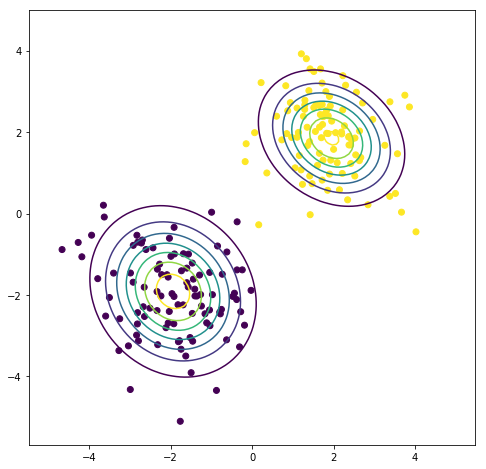

In [327]:
plt.figure(figsize=(8,8));
for i in range(k):
    mu = mus[i]
    sigma = sigmas[i]
    points = np.linspace(-5, 5, 100)
    Xv, Yv = np.meshgrid(points, points)
    x = np.reshape(Xv,100*100,1)
    y = np.reshape(Yv,100*100,1)
    x = np.vstack((x,y)).T
    Z = mnormal.pdf(x,mu,sigma)
    Z = np.reshape(Z,(100,100))
    plt.contour(Xv, Yv, Z)
    plt.axis('equal')
plt.scatter(X[:,0],X[:,1],c=c);    